In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 3a

In [2]:
dt = 0.1 # Time step (seconds)
total_simulation_time = 30 # Total time of simulation (seconds)
time = np.arange(0, total_simulation_time + dt, dt) # timestamp array

def run_simulation_constant_input(v, w):
    # Initialize state [x, y, theta]
    state = np.array([0.0, 0.0, 0.0])

    _trajectory = [] # empty list to store state at each timestamp

    # Simulation loop
    for t in time:
        # Store the current state
        _trajectory.append(state.copy())

        # Construct state matrix
        A = np.array([[np.cos(state[2]), 0], [np.sin(state[2]), 0], [0, 1]])
        
        # Use euler's method to update state based on the derivative of the state at the current timestamp
        state += (A @ np.array([[v], [w]])).reshape(-1) * dt
        
    return np.insert(np.array(_trajectory), 0, time, axis=1) # return list of states, along with the timestamp at each state

def run_simulation(v, w):
    # Initialize state [x, y, theta]
    state = np.array([0.0, 0.0, 0.0])

    _trajectory = [] # empty list to store state at each timestamp

    # Simulation loop
    for i, _ in enumerate(time):
        # Store the current state
        _trajectory.append(state.copy())

        # Construct state matrix
        A = np.array([[np.cos(state[2]), 0], [np.sin(state[2]), 0], [0, 1]])
        
        # Use euler's method to update state based on the derivative of the state at the current timestamp
        state += (A @ np.array([[v[i]], [w[i]]])).reshape(-1) * dt
        
    return np.insert(np.array(_trajectory), 0, time, axis=1) # return list of states, along with the timestamp at each state

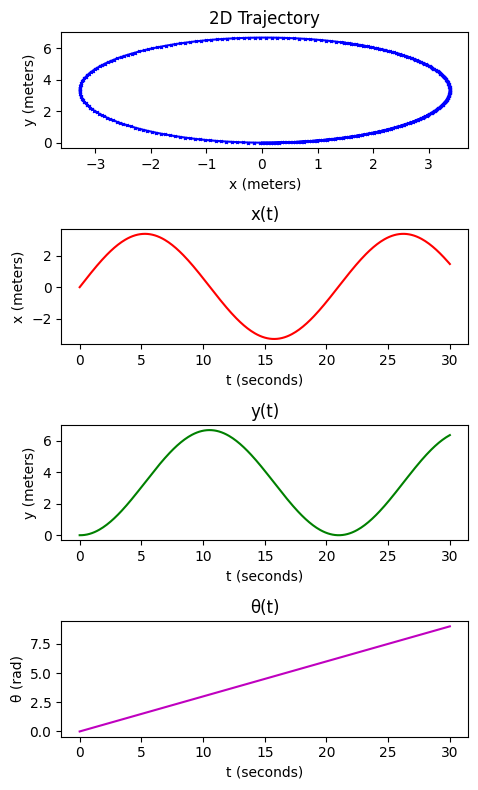

In [3]:
trajectory = run_simulation_constant_input(1, 0.3)

fig, axs = plt.subplots(4, figsize=(5, 8))  # Increase figure size

# Adjust space between plots and add margins
fig.subplots_adjust(wspace=2, hspace=2)

# Plot each figure on its own subplot
axs[0].plot(trajectory[:, 1], trajectory[:, 2], color='b', marker='x', markersize=2)
axs[0].set_xlabel("x (meters)")
axs[0].set_ylabel("y (meters)")
axs[0].set_title("2D Trajectory")

axs[1].plot(trajectory[:, 0], trajectory[:, 1], color='r')
axs[1].set_ylabel("x (meters)")
axs[1].set_xlabel("t (seconds)")
axs[1].set_title("x(t)")

axs[2].plot(trajectory[:, 0], trajectory[:, 2], color='g')
axs[2].set_ylabel("y (meters)")
axs[2].set_xlabel("t (seconds)")
axs[2].set_title("y(t)")

axs[3].plot(trajectory[:, 0], trajectory[:, 3], color='m')
axs[3].set_ylabel("θ (rad)")
axs[3].set_xlabel("t (seconds)")
axs[3].set_title("θ(t)")

plt.tight_layout()
plt.show()

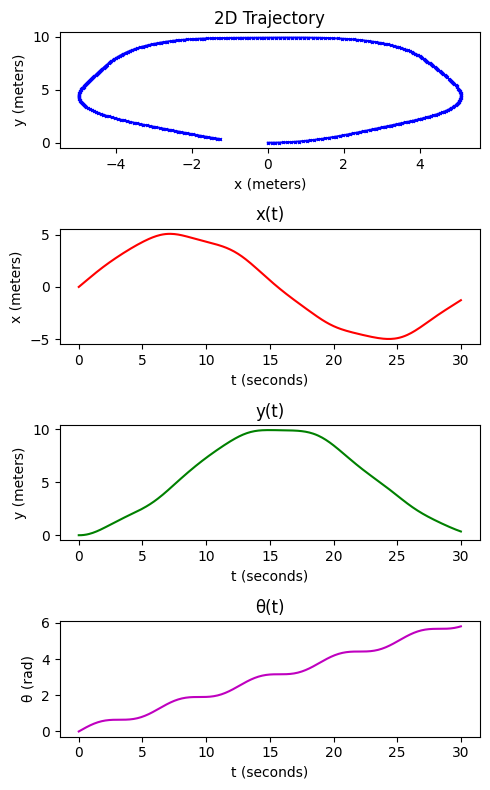

In [4]:
v_profile = 0.1 * np.sin(time) + 1
w_profile = 0.2 * np.cos(time)+ 0.2

trajectory = run_simulation(v_profile, w_profile)

fig, axs = plt.subplots(4, figsize=(5, 8))  # Increase figure size

# Adjust space between plots and add margins
fig.subplots_adjust(wspace=2, hspace=2)

# Plot each figure on its own subplot
axs[0].plot(trajectory[:, 1], trajectory[:, 2], color='b', marker='x', markersize=2)
axs[0].set_xlabel("x (meters)")
axs[0].set_ylabel("y (meters)")
axs[0].set_title("2D Trajectory")

axs[1].plot(trajectory[:, 0], trajectory[:, 1], color='r')
axs[1].set_ylabel("x (meters)")
axs[1].set_xlabel("t (seconds)")
axs[1].set_title("x(t)")

axs[2].plot(trajectory[:, 0], trajectory[:, 2], color='g')
axs[2].set_ylabel("y (meters)")
axs[2].set_xlabel("t (seconds)")
axs[2].set_title("y(t)")

axs[3].plot(trajectory[:, 0], trajectory[:, 3], color='m')
axs[3].set_ylabel("θ (rad)")
axs[3].set_xlabel("t (seconds)")
axs[3].set_title("θ(t)")

plt.tight_layout()
plt.show()

## Question 3b

In [5]:
dt = 0.1   # Time step (seconds)
total_simulation_time = 30     # Total time of simulation (seconds)
time = np.arange(0, total_simulation_time + dt, dt) # timestamp array
T = 0.2 # track length
r = 0.1 # wheel radius

def run_simulation_constant_input(ul, ur):
    # Initialize state [x, y, theta]
    state = np.array([0.0, 0.0, 0.0])

    _trajectory = [] # empty list to store state at each timestamp

    # Simulation loop
    for _ in time:
        # Store the current state
        _trajectory.append(state.copy())

        # Construct state matrix
        A = np.array([[0.5 * r * np.cos(state[2]), 0.5 * r * np.cos(state[2])], [0.5 * r * np.sin(state[2]), 0.5 * r * np.sin(state[2])], [r / T, -1 * r / T]])
        
        # Use euler's method to update state based on the derivative of the state at the current timestamp
        state += (A @ np.array([[ur], [ul]])).reshape(-1) * dt
        
    return np.insert(np.array(_trajectory), 0, time, axis=1) # return list of states, along with the timestamp at each state

def run_simulation(ul, ur):
    # Initialize state [x, y, theta]
    state = np.array([0.0, 0.0, 0.0])

    _trajectory = [] # empty list to store state at each timestamp

    # Simulation loop
    for i, _ in enumerate(time):
        # Store the current state
        _trajectory.append(state.copy())

        # Construct state matrix
        A = np.array([[0.5 * r * np.cos(state[2]), 0.5 * r * np.cos(state[2])], [0.5 * r * np.sin(state[2]), 0.5 * r * np.sin(state[2])], [r / T, -1 * r / T]])
        
        # Use euler's method to update state based on the derivative of the state at the current timestamp
        state += (A @ np.array([[ur[i]], [ul[i]]])).reshape(-1) * dt
        
    return np.insert(np.array(_trajectory), 0, time, axis=1) # return list of states, along with the timestamp at each state

#### if the modified code in Question 3b were to be executed, uncomment the cell below and input the wheel speeds (either constant or profile)

In [6]:
# trajectory = run_simulation_constant_input(..., ...)

# ul_profile = ...
# ur_profile = ...

# trajectory = run_simulation(ul_profile, ur_profile)

## Question 4b

In [7]:
r = 10.0 # wheel radius [cm]
l = 25.0 # G.C. to wheel center distance [cm]
dt = 0.1 # Time step (seconds)
total_simulation_time = 30 # Total time of simulation (seconds)
time = np.arange(0, total_simulation_time + dt, dt) # timestamp array

def run_simulation_constant_input(u1, u2, u3):
    # Initialize state [x, y, theta]
    state = np.array([0.0, 0.0, 0.0])

    _trajectory = [] # empty list to store state at each timestamp

    # Simulation loop
    for t in time:
        # Store the current state
        _trajectory.append(state.copy())

        # Construct state matrix
        A = np.linalg.inv((1/r) * np.array([
            [-np.sin(state[2]), np.cos(state[2]), l], 
            [np.cos(state[2] + 7*np.pi/6), np.sin(state[2] + 7*np.pi/6), l*(-1/2)*np.sin(7*np.pi/6) - l*(np.sqrt(3)/2)*np.cos(7*np.pi/6)], 
            [np.cos(state[2] + 11*np.pi/6), np.sin(state[2] + 11*np.pi/6), l*(-1/2)*np.sin(11*np.pi/6) + l*(np.sqrt(3)/2)*np.cos(11*np.pi/6)]
        ]))
        
        # Use euler's method to update state based on the derivative of the state at the current timestamp
        state += np.matmul(A, np.array([[u1], [u2], [u3]])).reshape(-1) * dt
        
    return np.insert(np.array(_trajectory), 0, time, axis=1) # return list of states, along with the timestamp at each state

def run_simulation(u1, u2, u3):
    # Initialize state [x, y, theta]
    state = np.array([0.0, 0.0, 0.0])

    _trajectory = [] # empty list to store state at each timestamp

    # Simulation loop
    for i, _ in enumerate(time):
        # Store the current state
        _trajectory.append(state.copy())

        # Construct state matrix
        A = np.linalg.inv((1/r) * np.array([
            [-np.sin(state[2]), np.cos(state[2]), l], 
            [np.cos(state[2] + 7*np.pi/6), np.sin(state[2] + 7*np.pi/6), l*(-1/2)*np.sin(7*np.pi/6) - l*(np.sqrt(3)/2)*np.cos(7*np.pi/6)], 
            [np.cos(state[2] + 11*np.pi/6), np.sin(state[2] + 11*np.pi/6), l*(-1/2)*np.sin(11*np.pi/6) + l*(np.sqrt(3)/2)*np.cos(11*np.pi/6)]
        ]))
        
        # Use euler's method to update state based on the derivative of the state at the current timestamp
        state += np.matmul(A, np.array([[u1[i]], [u2[i]], [u3[i]]])).reshape(-1) * dt
        
    return np.insert(np.array(_trajectory), 0, time, axis=1) # return list of states, along with the timestamp at each state

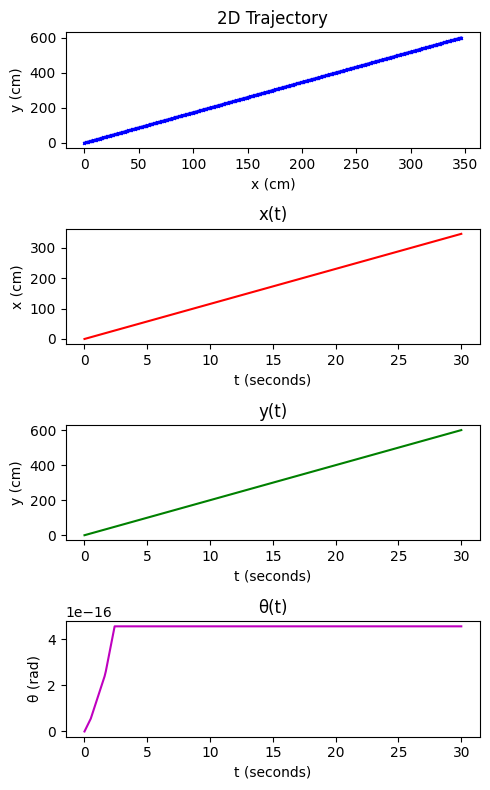

In [8]:
trajectory = run_simulation_constant_input(2, -2, 0) # 60 degree straight line path 

fig, axs = plt.subplots(4, figsize=(5, 8))  # Increase figure size

# Adjust space between plots and add margins
fig.subplots_adjust(wspace=2, hspace=2)

# Plot each figure on its own subplot
axs[0].plot(trajectory[:, 1], trajectory[:, 2], color='b', marker='x', markersize=2)
axs[0].set_xlabel("x (cm)")
axs[0].set_ylabel("y (cm)")
axs[0].set_title("2D Trajectory")

axs[1].plot(trajectory[:, 0], trajectory[:, 1], color='r')
axs[1].set_ylabel("x (cm)")
axs[1].set_xlabel("t (seconds)")
axs[1].set_title("x(t)")

axs[2].plot(trajectory[:, 0], trajectory[:, 2], color='g')
axs[2].set_ylabel("y (cm)")
axs[2].set_xlabel("t (seconds)")
axs[2].set_title("y(t)")

axs[3].plot(trajectory[:, 0], trajectory[:, 3], color='m')
axs[3].set_ylabel("θ (rad)")
axs[3].set_xlabel("t (seconds)")
axs[3].set_title("θ(t)")

plt.tight_layout()
plt.show()

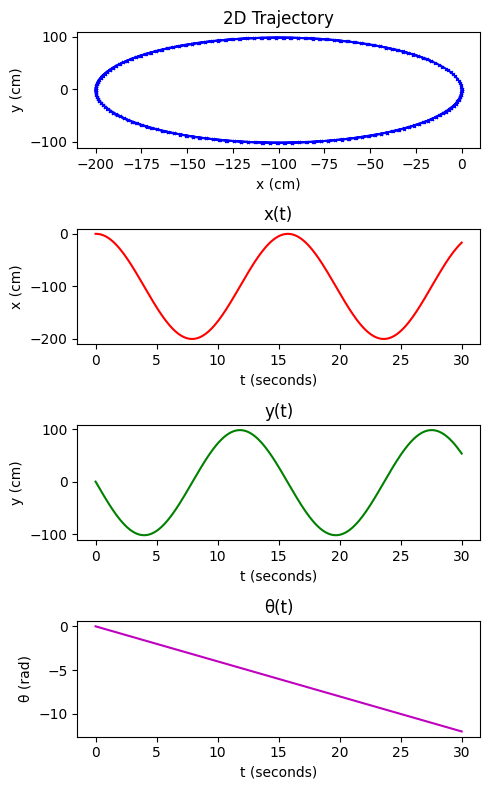

In [11]:
trajectory = run_simulation_constant_input(-5, 1, 1) # circular path with radius = 100 cm

fig, axs = plt.subplots(4, figsize=(5, 8))  # Increase figure size

# Adjust space between plots and add margins
fig.subplots_adjust(wspace=2, hspace=2)

# Plot each figure on its own subplot
axs[0].plot(trajectory[:, 1], trajectory[:, 2], color='b', marker='x', markersize=2)
axs[0].set_xlabel("x (cm)")
axs[0].set_ylabel("y (cm)")
axs[0].set_title("2D Trajectory")

axs[1].plot(trajectory[:, 0], trajectory[:, 1], color='r')
axs[1].set_ylabel("x (cm)")
axs[1].set_xlabel("t (seconds)")
axs[1].set_title("x(t)")

axs[2].plot(trajectory[:, 0], trajectory[:, 2], color='g')
axs[2].set_ylabel("y (cm)")
axs[2].set_xlabel("t (seconds)")
axs[2].set_title("y(t)")

axs[3].plot(trajectory[:, 0], trajectory[:, 3], color='m')
axs[3].set_ylabel("θ (rad)")
axs[3].set_xlabel("t (seconds)")
axs[3].set_title("θ(t)")

plt.tight_layout()
plt.show()